## Libaries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

## Read Data

In [62]:
data =  pd.read_csv('creditcard.csv\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [63]:
df = pd.DataFrame(data)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There is no null values

### Fraud cases and Genuine case

In [66]:
fraud_case = df[df['Class']==1].shape[0]
Genuine_case = df[df['Class']==0].shape[0]

In [67]:
print('Number of fraud cases:',fraud_case)
print('Number of Genuine cases:',Genuine_case)

Number of fraud cases: 492
Number of Genuine cases: 284315


## Plotting

<Axes: xlabel='Class', ylabel='count'>

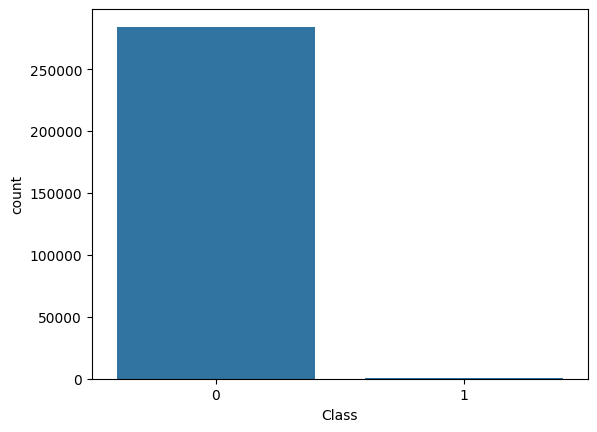

In [68]:
sns.countplot(x='Class', data=df)

### Correlation Matrix

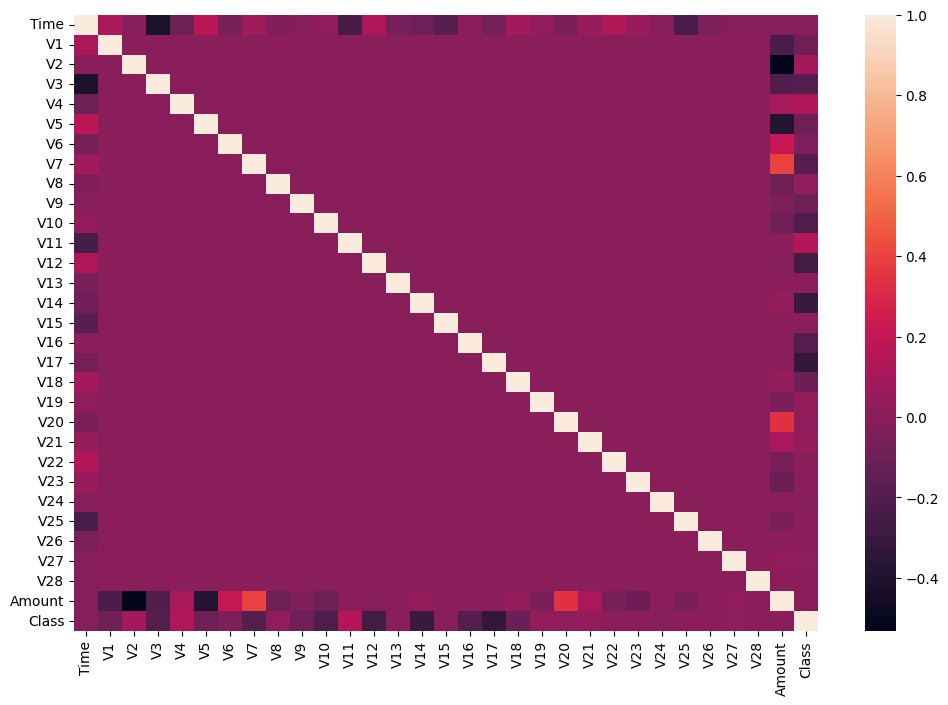

In [18]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix)
plt.show()

## label and features

In [71]:
y = df['Class']
X = df.drop('Class',axis=1)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Model 1

train the random forest model using imbalanced data set

In [29]:
model1=RandomForestClassifier(n_estimators=500)

In [30]:
model1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [32]:
y_pred=model1.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [39]:
confusion_matrix(y_test, y_pred)

array([[56862,     2],
       [   21,    77]], dtype=int64)

### Class weight

The formula for calculating the class weight is:

$$ w_j = \frac{n}{k \cdot n_j} $$


Where:
- \( w_j \) is the weight for class \( j \),
- \( n \) is the total number of samples,
- \( n_j \) is the number of samples in class \( j \),
- \( k \) is the total number of classes.


In [73]:
unique = df['Class'].unique()
unique

array([0, 1], dtype=int64)

In [42]:
out_dict =  {}
for i in unique:
    out_dict[i]=df.shape[0]/df.loc[df['Class']==i].shape[0]*len(unique)

In [43]:
out_dict

{0: 2.003460950002638, 1: 1157.7520325203252}

The class weights in RandomForestClassifier can be calculated manually like this. Here, we calculate the weight for each class as the total number of samples divided  by the number of samples in that class, multiplied by the total number of unique classes.These weights are used for the RandomForestClassifier to handle imbalanced classes.

### Model 2

Train the random forest model using balanced data set

In [45]:
model2 = RandomForestClassifier(class_weight='balanced')

In [46]:
model2.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [47]:
y_pred1 = model2.predict(X_test)

In [50]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



### Feature Importance

To discover important features, we will use the property [`feature_importances_`] provided by an instance of `RandomForestClassifier`. 

In [88]:
feature_importance = model2.feature_importances_

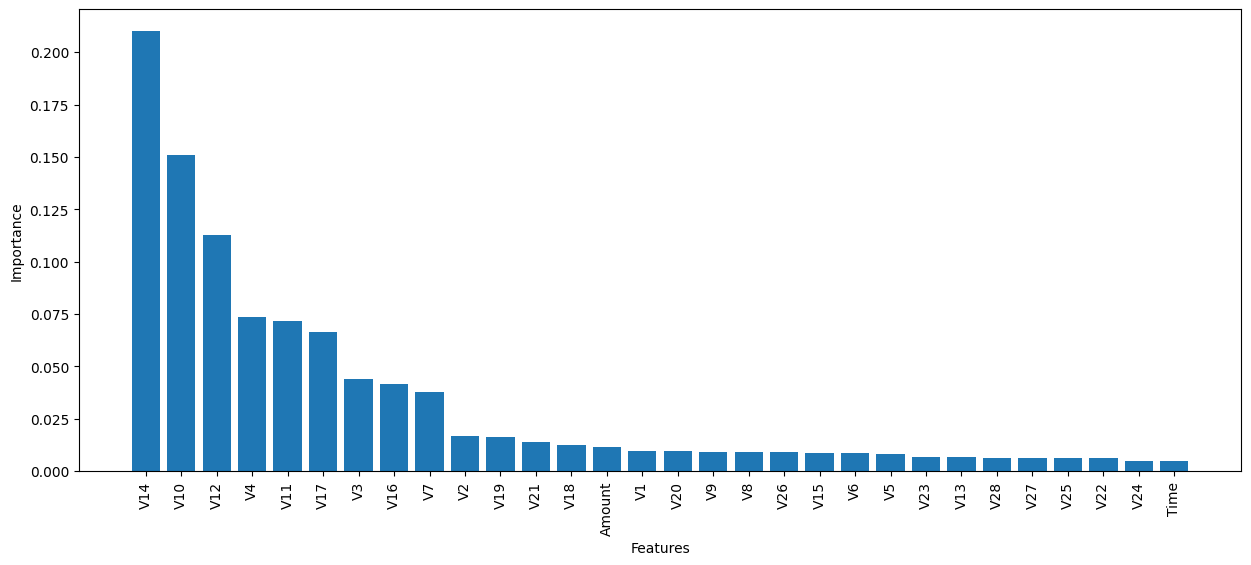

In [93]:
# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]
names = [df.columns[i] for i in indices]

plt.figure(figsize=(15, 6))
plt.bar(range(X.shape[1]), feature_importance[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


From the graph above we can see that the least important features are: `V1, V20,V9,V8,V26,V15,V6,V23,V13,V28,V27,V25,V22,V24,TIME`. Let's create a new random forest classifier by removing these features and see if there is any improvement in performance. 



In [95]:
col_drop = ['V1','V20','V9','V8','V26','V15','V6','V23','V13','V28','V27','V25','V22','V24','Time']
X_train_new = X_train.drop(columns=col_drop)
X_test_new = X_test.drop(columns=col_drop)

In [97]:
model3 = RandomForestClassifier(class_weight='balanced')

In [98]:
model3.fit(X_train_new,y_train)

RandomForestClassifier(class_weight='balanced')

In [99]:
y_pred2 = model3.predict(X_test_new)

In [100]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.76      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



The result remained unchanged, indicating that overall performance didn't shift much